In [1]:
#first I have downloaded the GLD and USO daily prices form yahoo finance, and saved them as csv files
#we will go through all the steps to create a simple pair trading strategy between them.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen as johansen_test
from statsmodels.tsa.stattools import coint as cadf_test
import datetime
from statsmodels.regression.linear_model import OLS as least_sqaures_regression
from statsmodels.tsa.stattools import adfuller
import numpy as np

ewc = pd.read_csv("../EWC_vs_EWA_mean_reversion_bollinger_band/Stock_data/EWC.csv")
ewa = pd.read_csv("../EWC_vs_EWA_mean_reversion_bollinger_band/Stock_data/EWA.csv")
ewa["Date"] = pd.to_datetime(ewa["Date"])
ewc["Date"] = pd.to_datetime(ewc["Date"])



1.404935009410224
0.7100701951177416


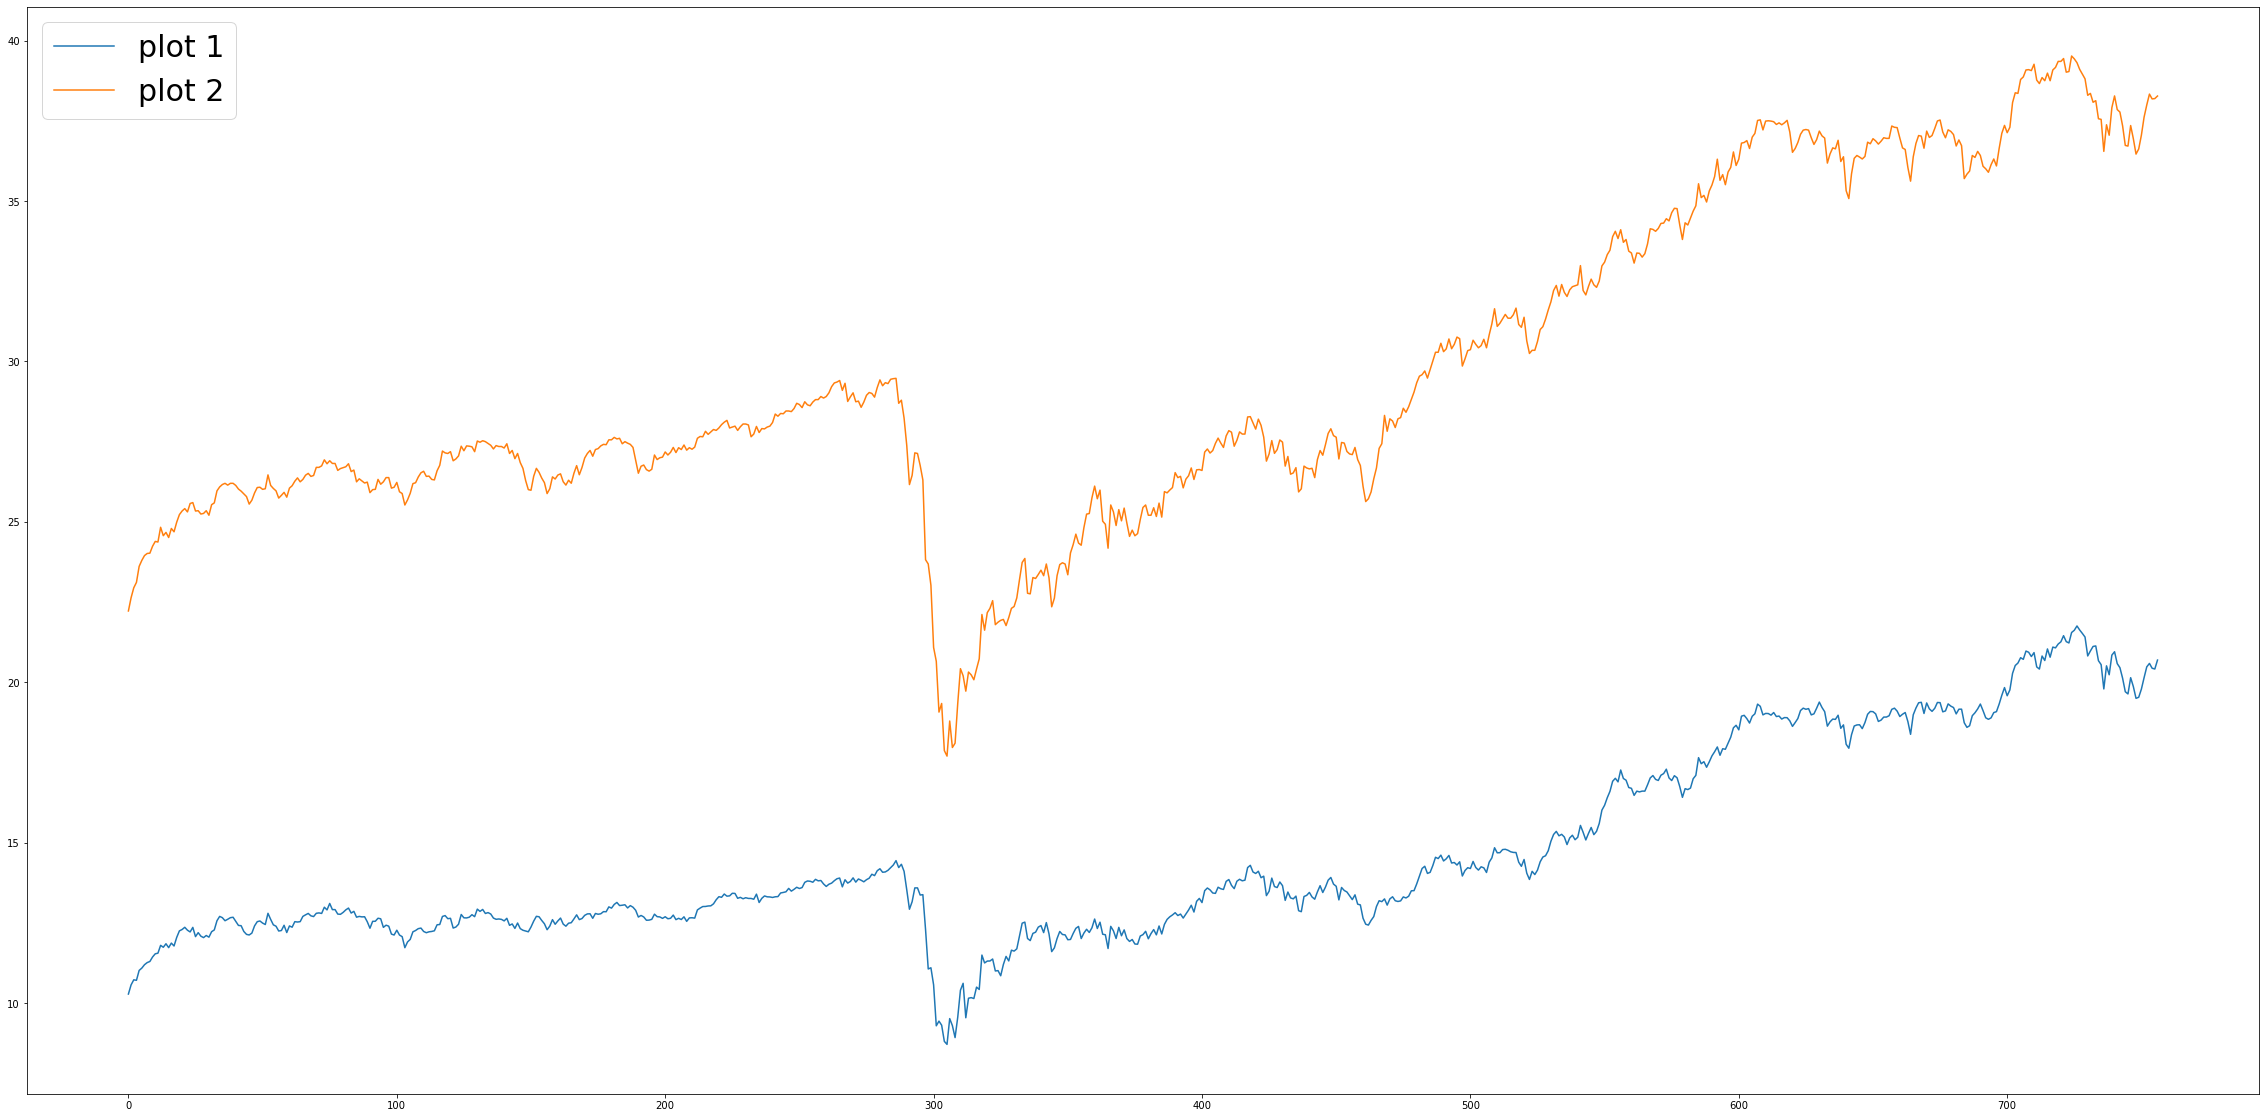

In [17]:
#find the hedge ratio with a simple least sqaures regression
model_1 = least_sqaures_regression(ewc["Open"],ewa["Open"])
model_2 = least_sqaures_regression(ewa["Open"],ewc["Open"]) #switch the dependant and independant variables
results_1 = model_1.fit()
results_2 = model_2.fit()
print(results_1.params[0])
print(results_2.params[0])


stationary_plot = pd.DataFrame()
stationary_plot["Plot"] = ewc["Open"] - results_2.params[0] * ewa["Open"]


plt.figure(figsize=(40,20))
plt.plot(stationary_plot["Plot"] , label = "plot 1")
plt.plot(ewc["Open"] , label = "plot 2")

plt.legend(loc="upper left", prop={'size': 30})
plt.savefig("staionary example", dpi=200,bbox_inches='tight')
plt.show()



In [18]:
adfuller(stationary_plot["Plot"])

(-0.439959559222557,
 0.9032101486279716,
 7,
 749,
 {'1%': -3.439110818166223,
  '5%': -2.8654065210185795,
  '10%': -2.568828945705979},
 -143.3804208871445)

In [19]:
adfuller(ewc["Open"])

(-0.7982895406439698,
 0.8196239858542839,
 7,
 749,
 {'1%': -3.439110818166223,
  '5%': -2.8654065210185795,
  '10%': -2.568828945705979},
 513.3832739948602)